In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
df=pd.read_csv(r'Irish_DataSet\standardData2.txt',header=None,delimiter=" ")
# df=pd.read_csv(r'Irish_DataSet\standardMetersForSmallData.txt',header=None,delimiter=" ")
df.rename(columns={0: "ID", 1: "Duration", 2: "Consumption"},inplace=True)
df

,ID,Duration,Consumption
0,1002,1.01,0.481127
1,1002,1.03,0.085061
2,1002,1.05,0.158161
3,1002,1.07,0.030569
4,1002,1.09,0.186071
...,...,...,...
453145,1094,171.91,0.273827
453146,1094,171.93,0.243249
453147,1094,171.95,0.240844
453148,1094,171.97,0.000000


In [4]:
# plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})
!pip install hdbscan

     ---------------------------------------- 5.2/5.2 MB 7.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Cython-0.29.36-py2.py3-none-any.whl (988 kB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-win_amd64.whl size=600427 sha256=a992898b4f0e02a338d14b4320a90283b3d76886eb3c42b71675ac5c98980500
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\e3\c7\93\1036606950c902cb2f095fc78d4614c531c52e0dc55459e39f
Successfully built hdbscan


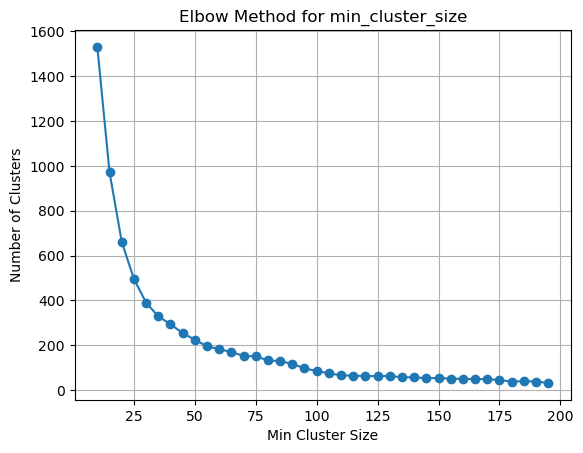

In [19]:
df = df.sample(frac=0.10, random_state=42)

import matplotlib.pyplot as plt
consumption_data = df['Consumption'].values.reshape(-1, 1)

min_cluster_sizes = range(10, 200, 5)  # Adjust the range as needed
cluster_counts = []

for min_size in min_cluster_sizes:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_size)
    cluster_labels = clusterer.fit_predict(consumption_data)
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    cluster_counts.append(n_clusters)

plt.plot(min_cluster_sizes, cluster_counts, marker='o', linestyle='-')
plt.xlabel('Min Cluster Size')
plt.ylabel('Number of Clusters')
plt.title('Elbow Method for min_cluster_size')
plt.grid(True)
plt.show()

In [21]:
import hdbscan

# Extract the 'Consumption' column as a NumPy array
consumption_data = df['Consumption'].values.reshape(-1, 1)

# Create an HDBSCAN instance with your preferred parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)  # Adjust min_cluster_size as needed

# Fit the data to the HDBSCAN model
clusterer.fit(consumption_data)

# Access cluster labels and probabilities
cluster_labels = clusterer.labels_
cluster_probabilities = clusterer.probabilities_

# Number of clusters found (-1 indicates noise/outliers)
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise_ = list(cluster_labels).count(-1)

# Add the cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Display the clustering results
print(f'Number of clusters: {n_clusters_}')
print(f'Number of noise points: {n_noise_}')

Number of clusters: 1530
Number of noise points: 7810


In [27]:
df

,ID,Duration,Consumption,Cluster,cluster_label
43572,1014,17.45,0.051444,1271,0
259154,1058,54.09,0.134680,-1,0
321164,1069,97.29,0.037488,814,0
26332,1005,14.65,0.154718,1185,0
403903,1083,42.07,0.449534,175,0
...,...,...,...,...,...
173655,1039,54.11,0.123122,773,0
281068,1061,150.37,0.215867,1451,0
84609,1020,154.19,0.085300,992,0
429745,1092,45.91,0.563580,105,0
